# Problem Statement

Personal financial **risk assessment is important to analyze because it allows us to reduce financial risk through effective risk management.**

Thus, this project is used to `analyze personal risk assessment` globally

The main objectives of this project is described using SMART Framework defined below.

> To reduce the occurrence of high financial risk ratings globally by 3% within 3 months, I will analyze a dataset gathered from Kaggle. This analysis will involve formulating relevant questions and creating visualizations based on the identified issues. The findings will help understand the contributing factors and provide targeted recommendations to address the high financial risk ratings.

As stated in my previous objectives, I want to analyze my dataset to answer the following questions:

1. What's the `sum of loan based on education level and risk rating`
2. What's the `average of debt-to-income ratio grouped by employment status and risk rating`
3. What's the `average assets based on educational level and risk rating`
4. What's the `proportion of high financial risk rating by age band`
5. What's the `proportion of low financial risk rating by age band`
6. What's the `distribution of DTI Ratio by high & low risk ratings`

In [2]:
import json
import pandas as pd
from os.path import join as path_join

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import scipy.stats as stats

# Data Loading

In this section I will load the dataset that was gathered from [kaggle](https://www.kaggle.com/datasets/preethamgouda/financial-risk) and do some simple inspections, such as:

- Inspect the dataset's overview
- Inspect dataset's summary
- Inspect dataset's column names
- Inspect unique values of multiple columns in the dataframe

In [3]:
# define path const
DS_DIR_PATH = "dataset"

In [4]:
df = pd.read_csv(path_join(DS_DIR_PATH, "financial_risk_assessment.csv"))
df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


- There are 15,000 rows and 20 columns in the dataset
- There are some missing values on assets value and number of dependents, but there might be any on other columns as well

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [6]:
df.isna().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

## Insights & Actions

Insights:   
- There are 15,000 observations and 20 columns in the dataset.
- There are some columns containing missing values of 2,250 observations, such as: `Income`, `Credit Score`, `Loan Amount`, `Assets Value`, `Number of Dependents`

- Some columns are using inappropriate data type, this problem defined as follows:
    - Should be `categorical`:
        - Employment Status
        - Education Level
        - Risk Rating
        - Loan Purpose

Actions:
- Adjust data type of columns defined above
- Identify missing values whether the are MAR, MCAR, or MNAR. But, **I need to filter required columns first**

In [7]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating'],
      dtype='object')

Insights:

- All columns' names are clear and ready to be used for further analysis

In [8]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


# Data Cleaning & Preparation

This section used to prepare and clean the dataset for further analysis

In [12]:
# create a copy of dataframe to preserve the original df
df_clean = df.copy()

## Create Age Band Column

In this section, I will create new columns to support my analysis:
- For analysis porposes, `I need the age to be groupped` and the dataset contains numerical age, I will `create new column called Age Band`
- I will use [this reference](https://www.mbi-geodata.com/en/sociodemographic-data/agebands/#:~:text=Age%20bands%20are%20an%20effective,quantify%20the%20consumers'%20potential%20demand) to group age using basic age band
- Since there are no missing values present in age column, this process can be done right away

In [13]:
# use cut() to group age
df_clean["Age Band"] = pd.cut(
    df_clean['Age'], 
    bins=[18, 29, 44, 59, df_clean["Age"].max()], 
    labels=["18-29", "30-44", "45-59", ">=60"], 
    include_lowest=True,
    right=True
)

In [14]:
df_clean.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,...,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating,Age Band
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,...,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low,45-59
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,...,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium,45-59
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,...,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium,18-29
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,...,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium,45-59
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,...,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low,18-29


## Create Continent Column

- Since areas in the dataset are highly sparsed, I won't use deeper geography (state, city, and country) to narrow down the area
- I will create a new column that contain continent of each country
- This approach will generate broader analysis, thus improving the analysis quality

In [15]:
country_continent_mapper = json.load(open(
    path_join(DS_DIR_PATH, "country_to_continent_mapper.json"),
    "r"
))

In [16]:
df_clean["Continent"] = df_clean["Country"].apply(lambda country: country_continent_mapper[country])

In [75]:
df_clean[["Country", "Continent"]]

,Country,Continent
0,Cyprus,Asia
1,Turkmenistan,Asia
2,Luxembourg,Europe
3,Uganda,Africa
4,Namibia,Africa
...,...,...
14995,Djibouti,Africa
14996,Congo,Africa
14997,Palau,Oceania
14998,Rwanda,Africa


In [77]:
cat_cols = [
    "Gender", 
    "Education Level", 
    "Marital Status",
    "Loan Purpose",
    "Employment Status",
    "Payment History",
    "City",
    "State",
    "Country",
    "Risk Rating",
    "Continent"
]

cat_cols

['Gender',
 'Education Level',
 'Marital Status',
 'Loan Purpose',
 'Employment Status',
 'Payment History',
 'City',
 'State',
 'Country',
 'Risk Rating',
 'Continent']

In [11]:
num_cols = [col for col in df.columns if col not in cat_cols]
num_cols

['Age',
 'Income',
 'Credit Score',
 'Loan Amount',
 'Years at Current Job',
 'Debt-to-Income Ratio',
 'Assets Value',
 'Number of Dependents',
 'Previous Defaults',
 'Marital Status Change']

Insights:
- Gender, Eduational Level, Marital Status, Loan Purpose, Employment Status, Payment History, City, State, Country, and Risk Rating columns are categorical columns and need a data type adjustment

## Adjust Column Data Type

In [17]:
df_clean.dtypes

Age                         int64
Gender                     object
Education Level            object
Marital Status             object
Income                    float64
Credit Score              float64
Loan Amount               float64
Loan Purpose               object
Employment Status          object
Years at Current Job        int64
Payment History            object
Debt-to-Income Ratio      float64
Assets Value              float64
Number of Dependents      float64
City                       object
State                      object
Country                    object
Previous Defaults         float64
Marital Status Change       int64
Risk Rating                object
Age Band                 category
Continent                  object
dtype: object

In this part, I will adjust columns' data types based on following scenarios:

- Change to `category`
    - Gender
    - Education Level (`ordinal`): High Scool, Bachelor's, Master's, PhD
    - Marital Status
    - Loan Purpose
    - Employment Status
    - Payment History
    - City
    - State
    - Country
    - Continent
    - Risk Rating (`ordinal`): Low, Medium, High
    - Age Band (`ordinal`): 18-29, 30-44, 45-59, >=60

- Change to `int`
    - Age
    - Credit Score
    - Years at Current Job
    - Assets Value
    - Number of Dependents
    - Previous Defaults
    - Marital Status Change
 
- Change to `float`
    - Income
    - Loan Amount
    - Debt-to-Income Ratio

### Ordinal

In [19]:
def dTypeToOrdinal(series:pd.Series, cat_order_list:list):
    """
    Adjust :series data type into ordinal category based on :cat_order_list

        params:
            series (pd.Series): the series that needs a data type convertion into ordinal
            cat_order_list (list): list of ordered categorical
        
        return:
            :series with ordinal data type
    """
    
    return pd.Categorical(
        series, 
        categories=cat_order_list, 
        ordered=True
    )

In [20]:
df_clean["Education Level"] = dTypeToOrdinal(
    df_clean["Education Level"],
    ["High School", "Bachelor's", "Master's", "PhD"]
)

In [21]:
df_clean["Education Level"].dtype

CategoricalDtype(categories=['High School', 'Bachelor's', 'Master's', 'PhD'], ordered=True, categories_dtype=object)

In [22]:
df_clean["Risk Rating"] = dTypeToOrdinal(
    df_clean["Risk Rating"],
    ["Low", "Medium", "High"]
)

In [23]:
df_clean["Risk Rating"].dtype

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True, categories_dtype=object)

In [24]:
df_clean["Age Band"].dtype

CategoricalDtype(categories=['18-29', '30-44', '45-59', '>=60'], ordered=True, categories_dtype=object)

### Nominal

In [25]:
# convert these columns into category
df_clean[[
    "Gender",
    "Marital Status",
    "Loan Purpose",
    "Employment Status", 
    "Payment History",
    "City",
    "State",
    "Country",
    "Continent"
]] = df_clean[[
    "Gender",
    "Marital Status",
    "Loan Purpose",
    "Employment Status", 
    "Payment History",
    "City",
    "State",
    "Country",
    "Continent"
]].astype("category")

In [26]:
# check columns' data types
df_clean.dtypes

Age                         int64
Gender                   category
Education Level          category
Marital Status           category
Income                    float64
Credit Score              float64
Loan Amount               float64
Loan Purpose             category
Employment Status        category
Years at Current Job        int64
Payment History          category
Debt-to-Income Ratio      float64
Assets Value              float64
Number of Dependents      float64
City                     category
State                    category
Country                  category
Previous Defaults         float64
Marital Status Change       int64
Risk Rating              category
Age Band                 category
Continent                category
dtype: object

### Int

In [27]:
# change data types to Int64 because there are some missing values (NaN)
df_clean[[
    "Age",
    "Credit Score",
    "Years at Current Job",
    "Assets Value",
    "Number of Dependents",
    "Previous Defaults",
    "Marital Status Change"
]] = df_clean[[
    "Age",
    "Credit Score",
    "Years at Current Job",
    "Assets Value",
    "Number of Dependents",
    "Previous Defaults",
    "Marital Status Change"
]].astype("Int64")

In [29]:
df_clean.dtypes

Age                         Int64
Gender                   category
Education Level          category
Marital Status           category
Income                    float64
Credit Score                Int64
Loan Amount               float64
Loan Purpose             category
Employment Status        category
Years at Current Job        Int64
Payment History          category
Debt-to-Income Ratio      float64
Assets Value                Int64
Number of Dependents        Int64
City                     category
State                    category
Country                  category
Previous Defaults           Int64
Marital Status Change       Int64
Risk Rating              category
Age Band                 category
Continent                category
dtype: object

### float

In [30]:
# change data types to float
df_clean[[
    "Income",
    "Loan Amount",
    "Debt-to-Income Ratio"
]] = df_clean[[
    "Income",
    "Loan Amount",
    "Debt-to-Income Ratio"
]].astype("float")

In [31]:
df_clean.dtypes

Age                         Int64
Gender                   category
Education Level          category
Marital Status           category
Income                    float64
Credit Score                Int64
Loan Amount               float64
Loan Purpose             category
Employment Status        category
Years at Current Job        Int64
Payment History          category
Debt-to-Income Ratio      float64
Assets Value                Int64
Number of Dependents        Int64
City                     category
State                    category
Country                  category
Previous Defaults           Int64
Marital Status Change       Int64
Risk Rating              category
Age Band                 category
Continent                category
dtype: object

## Verify the Truth of the Ratio Column

In [32]:
# get raw dti ratio
dti_ratio = df_clean["Loan Amount"]/df_clean["Income"]
dti_ratio

0        0.627934
1             NaN
2        0.657658
3        1.001245
4        0.739029
           ...   
14995    0.544564
14996    0.327549
14997    0.959330
14998    0.815132
14999         NaN
Length: 15000, dtype: float64

In [33]:
# compare values of raw dti ratio with dti ratio in dataset
(dti_ratio==df_clean["Debt-to-Income Ratio"]).value_counts()

False    15000
Name: count, dtype: int64

Insights:
- All values in Debt-to-Income Ratio are not correct

Actions:
- **Replace DTI Ratio values in dataset**

### Replace DTI Ratio

In [34]:
df_clean["Debt-to-Income Ratio"] = dti_ratio

In [35]:
df_clean[["Loan Amount", "Income", "Debt-to-Income Ratio"]]

,Loan Amount,Income,Debt-to-Income Ratio
0,45713.0,72799.0,0.627934
1,33835.0,NaN,NaN
2,36623.0,55687.0,0.657658
3,26541.0,26508.0,1.001245
4,36528.0,49427.0,0.739029
...,...,...,...
14995,26187.0,48088.0,0.544564
14996,35111.0,107193.0,0.327549
14997,44369.0,46250.0,0.959330
14998,32752.0,40180.0,0.815132


> DTI in dataset replaced successfully

## Columns Filtering

In [80]:
num_cols_analysis = num_cols
cat_cols_analysis = cat_cols.copy()

cat_cols_analysis.remove("City")
cat_cols_analysis.remove("State")
cat_cols_analysis.remove("Country")

## Missing Value Type Identification

In [37]:
df_clean.isna().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio     4163
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
Age Band                    0
Continent                   0
dtype: int64

> In this section, I will identify whether missing values in `Income`, `Credit Score`, `Loan Amount`, `Assets Value`, `Number of Dependents`, `Previous Defaults` columns can be categorized as MAR, MCAR, or MNAR.

In [39]:
num_cols_analysis

['Age',
 'Income',
 'Credit Score',
 'Loan Amount',
 'Years at Current Job',
 'Debt-to-Income Ratio',
 'Assets Value',
 'Number of Dependents',
 'Previous Defaults',
 'Marital Status Change']

In [81]:
cat_cols_analysis

['Gender',
 'Education Level',
 'Marital Status',
 'Loan Purpose',
 'Employment Status',
 'Payment History',
 'Risk Rating',
 'Continent']

In [41]:
def get_freq_on_specific_cat_col(selected_col: str, df: pd.DataFrame)->pd.Series:
    """
    Get frequency of :selected_col inside :df

        params:
            selected_col (str): column name of interest
            df (pd.DataFrame): the dataframe that contains dataset
    
        return:
            series of value counts
    """
    return df[selected_col].value_counts(normalize=True).round(2)

In [42]:
def get_med_mean_std_on_specific_num_col(selected_col: str, df: pd.DataFrame)->pd.DataFrame:
    """
    Get mean and median of :selected_col inside :df

        params:
            selected_col (str): column name of interest
            df (pd.DataFrame): the dataframe that contains dataset
        
        return:
            dataframe containing mean and med of :selected_col
    """
    return pd.DataFrame(df[selected_col].describe()[["mean", "50%",  "std"]].map(lambda val: f'{val:,.2f}'))

In [63]:
def print_missing_values_comparison_on_cat_cols(col_with_missing_values: str, df: pd.DataFrame=df_clean)->None:
    """
    
    Print missing values comparisons on :col_with_missing values
    for each categorical columns used for analysis (`cat_cols_analysis`)
    
        ============================================
        Example:
        
            df
            -------------
            | foo | bar |
            -------------
            |val1 | NaN |
            |val2 | NaN |
            |val1 |lorem|
            |val2 |ipsum|
            

        Output:
        
            Frequency of Missing Values in bar
            foo
            val1   1
            val2   1
            ...    ...

            Frequency of Non-Missing Values in bar
            foo
            val1   1
            val2   1
            ...    ...
            
        ==============================================

            params:
                col_with_missing_values (str): column name that contain missing values
                df (pd.DataFrame): data source, default=`df_clean`

            return: None
            
    """
    df_missing_values = df.loc[
                            df[col_with_missing_values].isna(),
                            df.columns!=col_with_missing_values
                        ]

    df_non_missing_values = df.loc[
                                df[col_with_missing_values].notna(),
                                df.columns!=col_with_missing_values
                            ]

    # remove column of interest from list if present
    cat_cols_analysis_cp = [col for col in cat_cols_analysis if col!=col_with_missing_values]
    
    for col_name in cat_cols_analysis_cp:
        print("="*60)

        print(f"Frequency of Missing Values in {col_with_missing_values}")
        print(get_freq_on_specific_cat_col(
            col_name, 
            df_missing_values
        ))
        
        print(f"\nFrequency of Non-Missing Values in {col_with_missing_values}")
        print(get_freq_on_specific_cat_col(
            col_name, 
            df_non_missing_values
        ))

        print("="*60, end="\n\n")

In [65]:
def print_missing_values_comparison_on_num_cols(col_with_missing_values: str, df: pd.DataFrame=df_clean)->None:
    """
    
    Print mean, median, and std on :col_with_missing values
    for each numerical columns used for analysis (`num_cols_analysis`)
    
        ============================================
        Example:
        
            df
            -------------
            | foo | bar |
            -------------
            |  80 | NaN |
            |  10 | NaN |
            |  70 |lorem|
            |  20 |ipsum|

        Output:
        
            Mean, Med, Std of Missing Values in bar
                   foo
            50%    45
            mean   45
            std    49.5
            ...    ... 
            
            
        ==============================================

            params:
                col_with_missing_values (str): column name that contain missing values
                df (pd.DataFrame): data source, default=`df_clean`

            return: None
            
    """
    df_missing_values = df.loc[
                            df[col_with_missing_values].isna(),
                            df.columns!=col_with_missing_values
                        ]

    df_non_missing_values = df.loc[
                                df[col_with_missing_values].notna(),
                                df.columns!=col_with_missing_values
                            ]

    # remove column of interest from list if present
    num_cols_analysis_cp = [col for col in num_cols_analysis if col!=col_with_missing_values]

    for col_name in num_cols_analysis_cp:
        print("="*60)

        print(f"Mean, Med, std of missing values in {col_with_missing_values}")
        print(get_med_mean_std_on_specific_num_col(
            col_name, 
            df_missing_values
        ))
        
        print(f"\nMean, Med, std non-missing values in {col_with_missing_values}")
        print(get_med_mean_std_on_specific_num_col(
            col_name, 
            df_non_missing_values
        ))

        print("="*60, end="\n\n")

### Income

#### Among Categorical Columns

In [84]:
print_missing_values_comparison_on_cat_cols("Income")

Frequency of Missing Values in Income
Gender
Non-binary    0.36
Female        0.33
Male          0.31
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Income
Gender
Non-binary    0.33
Female        0.33
Male          0.33
Name: proportion, dtype: float64

Frequency of Missing Values in Income
Education Level
PhD            0.27
Bachelor's     0.25
High School    0.25
Master's       0.23
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Income
Education Level
Bachelor's     0.26
High School    0.25
PhD            0.25
Master's       0.25
Name: proportion, dtype: float64

Frequency of Missing Values in Income
Marital Status
Widowed     0.26
Divorced    0.25
Married     0.25
Single      0.24
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Income
Marital Status
Widowed     0.26
Divorced    0.25
Single      0.25
Married     0.24
Name: proportion, dtype: float64

Frequency of Missing Values in Income
Loan Purpose
Auto        0.26
Pe

Insights:

- As we can see that missing values frequency on `Income` among all other categorical columns appear randomly. 
- In other words, **Missing values on Income column don't related with other categorical columns**
- Thus, this is a type of MCAR

#### Among Numerical Columns

In [69]:
print_missing_values_comparison_on_num_cols("Income")

Mean, Med, std of missing values in Income
        Age
mean  43.89
50%   44.00
std   15.03

Mean, Med, std non-missing values in Income
        Age
mean  43.37
50%   43.00
std   14.89

Mean, Med, std of missing values in Income
     Credit Score
mean       700.39
50%        701.00
std         58.33

Mean, Med, std non-missing values in Income
     Credit Score
mean       698.88
50%        699.00
std         57.03

Mean, Med, std of missing values in Income
     Loan Amount
mean   27,466.52
50%    27,866.00
std    13,001.38

Mean, Med, std non-missing values in Income
     Loan Amount
mean   27,447.10
50%    27,499.00
std    12,941.44

Mean, Med, std of missing values in Income
     Years at Current Job
mean                 9.57
50%                 10.00
std                  5.75

Mean, Med, std non-missing values in Income
     Years at Current Job
mean                 9.46
50%                  9.00
std                  5.77

Mean, Med, std of missing values in Income
     Debt-to-Inco

Insights:
- Comparison of mean, med, and std values between numerical columns with and without missing values in Income are all similar, except Debt-to-Income Ratio.
- DTI values are missing on rows with missing values because they're derrived from Income, which totally make sense
- These missing values are not related to other numerical columns
- Thus, these missing values on numerical columns are also MCAR

Actions:
- Drop rows with missing values on Income

### Credit Score

#### Among Categorical Column

In [92]:
print_missing_values_comparison_on_cat_cols("Credit Score")

Frequency of Missing Values in Credit Score
Gender
Non-binary    0.34
Male          0.33
Female        0.33
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Credit Score
Gender
Non-binary    0.34
Female        0.33
Male          0.33
Name: proportion, dtype: float64

Frequency of Missing Values in Credit Score
Education Level
Bachelor's     0.26
PhD            0.26
High School    0.26
Master's       0.22
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Credit Score
Education Level
Bachelor's     0.25
High School    0.25
PhD            0.25
Master's       0.25
Name: proportion, dtype: float64

Frequency of Missing Values in Credit Score
Marital Status
Divorced    0.26
Widowed     0.25
Married     0.25
Single      0.25
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Credit Score
Marital Status
Widowed     0.26
Divorced    0.25
Single      0.25
Married     0.24
Name: proportion, dtype: float64

Frequency of Missing Values in Cre

Insights:

- As we can see that missing values frequency on `Credit Score` among all other categorical columns appear randomly. 
- In other words, **Missing values on Income column don't related with other categorical columns**
- Thus, this is a type of MCAR

#### Among Numerical Column

In [93]:
print_missing_values_comparison_on_num_cols("Credit Score")

Mean, Med, std of missing values in Credit Score
        Age
mean  43.14
50%   42.00
std   15.00

Mean, Med, std non-missing values in Credit Score
        Age
mean  43.51
50%   43.00
std   14.90

Mean, Med, std of missing values in Credit Score
         Income
mean  69,685.72
50%   68,551.00
std   28,675.19

Mean, Med, std non-missing values in Credit Score
         Income
mean  69,977.20
50%   69,982.50
std   29,250.25

Mean, Med, std of missing values in Credit Score
     Loan Amount
mean   27,373.63
50%    27,139.00
std    12,940.47

Mean, Med, std non-missing values in Credit Score
     Loan Amount
mean   27,463.27
50%    27,618.00
std    12,952.13

Mean, Med, std of missing values in Credit Score
     Years at Current Job
mean                 9.60
50%                 10.00
std                  5.71

Mean, Med, std non-missing values in Credit Score
     Years at Current Job
mean                 9.45
50%                  9.00
std                  5.78

Mean, Med, std of missing va

Insights:
- Comparison of mean, med, and std values between numerical columns with and without missing values in Credit Score are all similar
- These missing values are not related to other numerical columns
- Thus, these missing values on numerical columns are also MCAR

Actions:
- Drop rows with missing values on Credit Score

### Loan Amount

#### Among Categorical Column

In [85]:
print_missing_values_comparison_on_cat_cols("Loan Amount")

Frequency of Missing Values in Loan Amount
Gender
Non-binary    0.34
Male          0.33
Female        0.33
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Loan Amount
Gender
Non-binary    0.34
Female        0.33
Male          0.33
Name: proportion, dtype: float64

Frequency of Missing Values in Loan Amount
Education Level
High School    0.27
Bachelor's     0.25
Master's       0.25
PhD            0.23
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Loan Amount
Education Level
Bachelor's     0.26
PhD            0.25
High School    0.25
Master's       0.24
Name: proportion, dtype: float64

Frequency of Missing Values in Loan Amount
Marital Status
Widowed     0.26
Divorced    0.25
Married     0.25
Single      0.24
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Loan Amount
Marital Status
Widowed     0.26
Divorced    0.25
Single      0.25
Married     0.24
Name: proportion, dtype: float64

Frequency of Missing Values in Loan Amou

Insights:

- As we can see that missing values frequency on `Loan Amount` among all other categorical columns appear randomly. 
- In other words, **Missing values on Income column don't related with other categorical columns**
- Thus, this is a type of MCAR

#### Among Numerical Column

In [71]:
print_missing_values_comparison_on_num_cols("Loan Amount")

Mean, Med, std of missing values in Loan Amount
        Age
mean  43.05
50%   43.00
std   15.36

Mean, Med, std non-missing values in Loan Amount
        Age
mean  43.52
50%   43.00
std   14.83

Mean, Med, std of missing values in Loan Amount
         Income
mean  70,131.99
50%   69,282.00
std   29,402.57

Mean, Med, std non-missing values in Loan Amount
         Income
mean  69,898.34
50%   69,862.00
std   29,122.47

Mean, Med, std of missing values in Loan Amount
     Credit Score
mean       699.16
50%        699.00
std         57.51

Mean, Med, std non-missing values in Loan Amount
     Credit Score
mean       699.10
50%        699.00
std         57.18

Mean, Med, std of missing values in Loan Amount
     Years at Current Job
mean                 9.45
50%                  9.00
std                  5.74

Mean, Med, std non-missing values in Loan Amount
     Years at Current Job
mean                 9.48
50%                  9.00
std                  5.78

Mean, Med, std of missing va

Insights:
- Comparison of mean, med, and std values between numerical columns with and without missing values in Loan Amount are all similar
- These missing values are not related to other numerical columns
- Thus, these missing values on numerical columns are also MCAR

Actions:
- Drop rows with missing values on Loan Amount

### Debt-to-Income Ratio

#### Among Categorical Column

In [94]:
print_missing_values_comparison_on_cat_cols("Debt-to-Income Ratio")

Frequency of Missing Values in Debt-to-Income Ratio
Gender
Non-binary    0.35
Female        0.33
Male          0.32
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Debt-to-Income Ratio
Gender
Male          0.33
Female        0.33
Non-binary    0.33
Name: proportion, dtype: float64

Frequency of Missing Values in Debt-to-Income Ratio
Education Level
Bachelor's     0.26
High School    0.25
PhD            0.25
Master's       0.24
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Debt-to-Income Ratio
Education Level
Bachelor's     0.26
High School    0.25
PhD            0.25
Master's       0.25
Name: proportion, dtype: float64

Frequency of Missing Values in Debt-to-Income Ratio
Marital Status
Widowed     0.26
Divorced    0.25
Married     0.25
Single      0.24
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Debt-to-Income Ratio
Marital Status
Widowed     0.26
Divorced    0.25
Single      0.25
Married     0.24
Name: proportion, dt

Insights:

- As we can see that missing values frequency on `DTI` among all other categorical columns appear randomly. 
- In other words, **Missing values on Assets Value column don't related with other categorical columns**
- Thus, this is a type of MCAR

#### Among Numerical Column

In [95]:
print_missing_values_comparison_on_num_cols("Debt-to-Income Ratio")

Mean, Med, std of missing values in Debt-to-Income Ratio
        Age
mean  43.42
50%   43.00
std   15.19

Mean, Med, std non-missing values in Debt-to-Income Ratio
        Age
mean  43.46
50%   43.00
std   14.80

Mean, Med, std of missing values in Debt-to-Income Ratio
         Income
mean  70,131.99
50%   69,282.00
std   29,402.57

Mean, Med, std non-missing values in Debt-to-Income Ratio
         Income
mean  69,898.34
50%   69,862.00
std   29,122.47

Mean, Med, std of missing values in Debt-to-Income Ratio
     Credit Score
mean       699.93
50%        700.00
std         57.77

Mean, Med, std non-missing values in Debt-to-Income Ratio
     Credit Score
mean       698.80
50%        699.00
std         57.02

Mean, Med, std of missing values in Debt-to-Income Ratio
     Loan Amount
mean   27,466.52
50%    27,866.00
std    13,001.38

Mean, Med, std non-missing values in Debt-to-Income Ratio
     Loan Amount
mean   27,447.10
50%    27,499.00
std    12,941.44

Mean, Med, std of missing va

Insights:
- Comparison of mean, med, and std values between numerical columns with and without missing values in DTI are all similar
- These missing values are not related to other numerical columns
- Thus, these missing values on numerical columns are also MCAR

Actions:
- Drop rows with missing values on DTI

### Assets Value

#### Among Categorical Column

In [82]:
print_missing_values_comparison_on_cat_cols("Assets Value")

Frequency of Missing Values in Assets Value
Gender
Male          0.35
Non-binary    0.34
Female        0.32
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Assets Value
Gender
Non-binary    0.34
Female        0.34
Male          0.33
Name: proportion, dtype: float64

Frequency of Missing Values in Assets Value
Education Level
Master's       0.25
Bachelor's     0.25
PhD            0.25
High School    0.25
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Assets Value
Education Level
Bachelor's     0.26
High School    0.25
PhD            0.25
Master's       0.24
Name: proportion, dtype: float64

Frequency of Missing Values in Assets Value
Marital Status
Widowed     0.26
Single      0.25
Divorced    0.25
Married     0.24
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Assets Value
Marital Status
Widowed     0.26
Divorced    0.25
Single      0.25
Married     0.24
Name: proportion, dtype: float64

Frequency of Missing Values in Ass

Insights:

- As we can see that missing values frequency on `Assets Values` among all other categorical columns appear randomly. 
- In other words, **Missing values on Assets Value column don't related with other categorical columns**
- Thus, this is a type of MCAR

#### Among Numerical Column

To identify missing values type among all numerical columns, I will compare median and mean of all numericals columns of missing and non missing values in asset value column

In [83]:
print_missing_values_comparison_on_num_cols("Assets Value")

Mean, Med, std of missing values in Assets Value
        Age
mean  43.40
50%   43.00
std   15.06

Mean, Med, std non-missing values in Assets Value
        Age
mean  43.46
50%   43.00
std   14.89

Mean, Med, std of missing values in Assets Value
         Income
mean  70,007.50
50%   69,703.00
std   29,327.07

Mean, Med, std non-missing values in Assets Value
         Income
mean  69,920.25
50%   69,830.00
std   29,135.88

Mean, Med, std of missing values in Assets Value
     Credit Score
mean       697.38
50%        695.00
std         57.46

Mean, Med, std non-missing values in Assets Value
     Credit Score
mean       699.42
50%        700.00
std         57.19

Mean, Med, std of missing values in Assets Value
     Loan Amount
mean   27,411.13
50%    27,734.50
std    12,939.69

Mean, Med, std non-missing values in Assets Value
     Loan Amount
mean   27,456.93
50%    27,500.00
std    12,952.35

Mean, Med, std of missing values in Assets Value
     Years at Current Job
mean             

Insights:
- Comparison of mean, med, and std values between numerical columns with and without missing values in Assets Value are all similar
- These missing values are not related to other numerical columns
- Thus, these missing values on numerical columns are also MCAR

Actions:
- Drop rows with missing values on Assets Value

### Number of Dependents

#### Among Categorical Column

In [96]:
print_missing_values_comparison_on_cat_cols("Number of Dependents")

Frequency of Missing Values in Number of Dependents
Gender
Female        0.33
Non-binary    0.33
Male          0.33
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Number of Dependents
Gender
Non-binary    0.34
Female        0.33
Male          0.33
Name: proportion, dtype: float64

Frequency of Missing Values in Number of Dependents
Education Level
Bachelor's     0.26
High School    0.25
PhD            0.25
Master's       0.24
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Number of Dependents
Education Level
Bachelor's     0.26
High School    0.25
PhD            0.25
Master's       0.24
Name: proportion, dtype: float64

Frequency of Missing Values in Number of Dependents
Marital Status
Divorced    0.25
Widowed     0.25
Married     0.25
Single      0.24
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Number of Dependents
Marital Status
Widowed     0.26
Divorced    0.25
Single      0.25
Married     0.24
Name: proportion, dt

Insights:

- As we can see that missing values frequency on `Number of Dependets` among all other categorical columns appear randomly. 
- In other words, **Missing values on Assets Value column don't related with other categorical columns**
- Thus, this is a type of MCAR

#### Among Numerical Column

In [97]:
print_missing_values_comparison_on_num_cols("Number of Dependents")

Mean, Med, std of missing values in Number of Dependents
        Age
mean  43.38
50%   43.00
std   14.91

Mean, Med, std non-missing values in Number of Dependents
        Age
mean  43.47
50%   43.00
std   14.91

Mean, Med, std of missing values in Number of Dependents
         Income
mean  69,214.05
50%   68,702.00
std   29,388.10

Mean, Med, std non-missing values in Number of Dependents
         Income
mean  70,059.91
50%   69,955.00
std   29,123.50

Mean, Med, std of missing values in Number of Dependents
     Credit Score
mean       699.47
50%        700.00
std         57.27

Mean, Med, std non-missing values in Number of Dependents
     Credit Score
mean       699.05
50%        699.00
std         57.23

Mean, Med, std of missing values in Number of Dependents
     Loan Amount
mean   26,951.53
50%    26,735.00
std    12,800.08

Mean, Med, std non-missing values in Number of Dependents
     Loan Amount
mean   27,535.74
50%    27,667.00
std    12,974.19

Mean, Med, std of missing va

Insights:
- Comparison of mean, med, and std values between numerical columns with and without missing values in Number of Dependets are all similar
- These missing values are not related to other numerical columns
- Thus, these missing values on numerical columns are also MCAR

Actions:
- Drop rows with missing values on Number of Dependents

### Previous Defaults

#### Among Categorical Column

In [98]:
print_missing_values_comparison_on_cat_cols("Previous Defaults")

Frequency of Missing Values in Previous Defaults
Gender
Male          0.35
Female        0.33
Non-binary    0.32
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Previous Defaults
Gender
Non-binary    0.34
Female        0.33
Male          0.33
Name: proportion, dtype: float64

Frequency of Missing Values in Previous Defaults
Education Level
High School    0.26
Bachelor's     0.26
PhD            0.25
Master's       0.24
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Previous Defaults
Education Level
Bachelor's     0.26
PhD            0.25
High School    0.25
Master's       0.24
Name: proportion, dtype: float64

Frequency of Missing Values in Previous Defaults
Marital Status
Widowed     0.27
Divorced    0.26
Single      0.25
Married     0.23
Name: proportion, dtype: float64

Frequency of Non-Missing Values in Previous Defaults
Marital Status
Widowed     0.26
Divorced    0.25
Single      0.25
Married     0.24
Name: proportion, dtype: float64

Freq

Insights:

- As we can see that missing values frequency on `Previous Defaults` among all other categorical columns appear randomly. 
- In other words, **Missing values on Assets Value column don't related with other categorical columns**
- Thus, this is a type of MCAR

#### Among Numerical Column

In [99]:
print_missing_values_comparison_on_num_cols("Previous Defaults")

Mean, Med, std of missing values in Previous Defaults
        Age
mean  43.75
50%   43.00
std   15.01

Mean, Med, std non-missing values in Previous Defaults
        Age
mean  43.40
50%   43.00
std   14.89

Mean, Med, std of missing values in Previous Defaults
         Income
mean  70,255.78
50%   70,374.00
std   29,059.32

Mean, Med, std non-missing values in Previous Defaults
         Income
mean  69,875.72
50%   69,691.00
std   29,183.21

Mean, Med, std of missing values in Previous Defaults
     Credit Score
mean       698.26
50%        696.00
std         57.02

Mean, Med, std non-missing values in Previous Defaults
     Credit Score
mean       699.26
50%        700.00
std         57.27

Mean, Med, std of missing values in Previous Defaults
     Loan Amount
mean   27,163.13
50%    27,294.00
std    12,863.81

Mean, Med, std non-missing values in Previous Defaults
     Loan Amount
mean   27,499.78
50%    27,607.00
std    12,964.77

Mean, Med, std of missing values in Previous Default

Insights:
- Comparison of mean, med, and std values between numerical columns with and without missing values in Previous Defaults are all similar
- These missing values are not related to other numerical columns
- Thus, these missing values on numerical columns are also MCAR

Actions:
- Drop rows with missing values on Previous Defaults

## Dropping Missing Values

- All missing values in `Income`, `Credit Score`, `Loan Amount`, `Debt-to-Income Ratio`, `Assets Value`, `Number of Dependets`, and `Previous Defaults` are MCAR. 
- Thus, I can delete all rows with missing values safely

In [100]:
# drop any rows with missing values
df_clean = df_clean.dropna()

In [101]:
# missing values inspection for each column
df_clean.isna().sum()

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
Age Band                 0
Continent                0
dtype: int64

> All missing values are droped successfully

# Analysis

In this sections I will create analysis to answer my questions thruogh visualizations.

1. What's the `sum of loan based on education level and risk rating`
2. What's the `average of debt-to-income ratio grouped by employment status and risk rating`
3. What's the `average assets based on educational level and risk rating`
4. What's the `proportion of high financial risk rating by age band`
5. What's the `proportion of low financial risk rating by age band`
6. What's the `distribution of DTI Ratio by high & low risk ratings`

## SUM of loan based on education level and risk rating

In [110]:
sum_of_loan_on_edu_lvl_risk_rating = df_clean[
    ["Education Level", "Risk Rating", "Loan Amount"]
].groupby(
    ["Education Level", "Risk Rating"],
    observed=True
).agg({"Loan Amount": "sum"}).rename(columns={"Loan Amount": "Sum of Loan Amount"})

sum_of_loan_on_edu_lvl_risk_rating

Sum of Loan Amount
Education Level Risk Rating                    
High School     Low                  23353283.0
                Medium               11719348.0
                High                  4307400.0
Bachelor's      Low                  24724339.0
                Medium               11871622.0
                High                  3203170.0
Master's        Low                  23584878.0
                Medium               11621851.0
                High                  4168513.0
PhD             Low                  22367685.0
                Medium               12329234.0
                High                  4379197.0

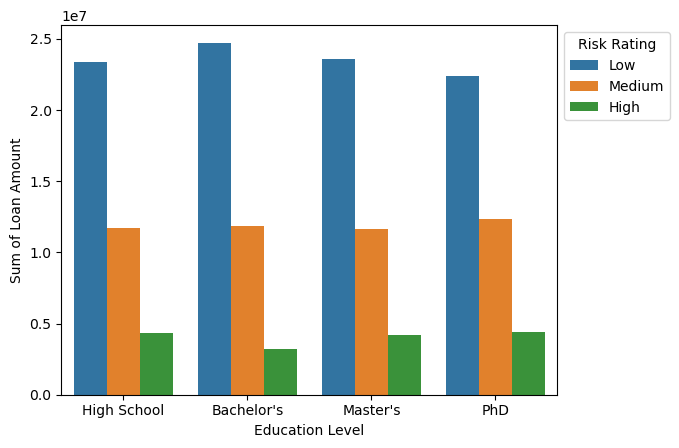

In [128]:
ax = sns.barplot(
    data=sum_of_loan_on_edu_lvl_risk_rating,
    x="Education Level",
    y="Sum of Loan Amount",
    hue="Risk Rating"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Insights:   
- People with high number of loan in total have low risk rating
- People with low sum of loan have high risk rating
- This can be happened because **people with high loan able to utilize their loan to generate more revenue, thus reducing risk rating.**

## AVG of DTI ratio grouped by employment status and risk rating

In [131]:
avg_dti_by_employment_status_risk_rating = df_clean[
    ["Debt-to-Income Ratio", "Employment Status", "Risk Rating"]
].groupby(
    ["Employment Status", "Risk Rating"],
    observed=True
).agg({"Debt-to-Income Ratio": "mean"}).rename(columns={"Debt-to-Income Ratio": "AVG of DTI"})

avg_dti_by_employment_status_risk_rating

AVG of DTI
Employment Status Risk Rating            
Employed          Low            0.496046
                  Medium         0.492574
                  High           0.508664
Self-employed     Low            0.477777
                  Medium         0.477444
                  High           0.519632
Unemployed        Low            0.516201
                  Medium         0.499241
                  High           0.487038

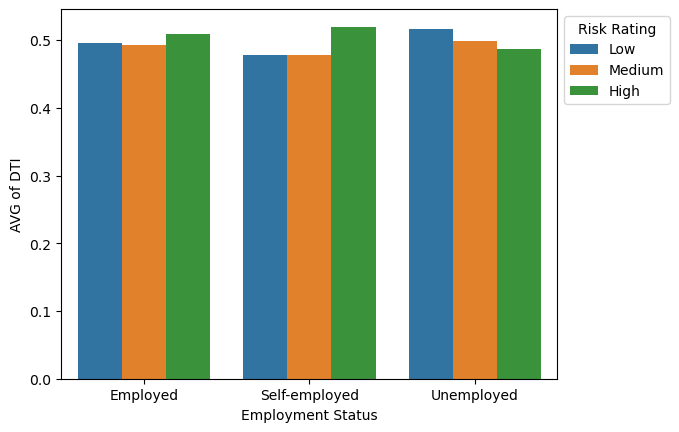

In [132]:
ax = sns.barplot(
    data=avg_dti_by_employment_status_risk_rating,
    x="Employment Status",
    y="AVG of DTI",
    hue="Risk Rating"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Insights:   
- Average of DTI ratio across Employment Status and Risk Rating are similar.
- People are able to manage their DTI to not exceed more than 50%.

## SUM of assets based on their educational level and risk rating

In [137]:
avg_asset_by_education_lvl_risk_rating = df_clean[
    ["Assets Value", "Education Level", "Risk Rating"]
].groupby(
    ["Education Level", "Risk Rating"],
    observed=True
).agg({"Assets Value": "sum"}).rename(columns={"Assets Value": "SUM of Assets"})

avg_asset_by_education_lvl_risk_rating

SUM of Assets
Education Level Risk Rating               
High School     Low              140823847
                Medium            67452994
                High              24048879
Bachelor's      Low              139723608
                Medium            72298717
                High              19009385
Master's        Low              138332108
                Medium            66921435
                High              23247623
PhD             Low              129496725
                Medium            69410524
                High              25192347

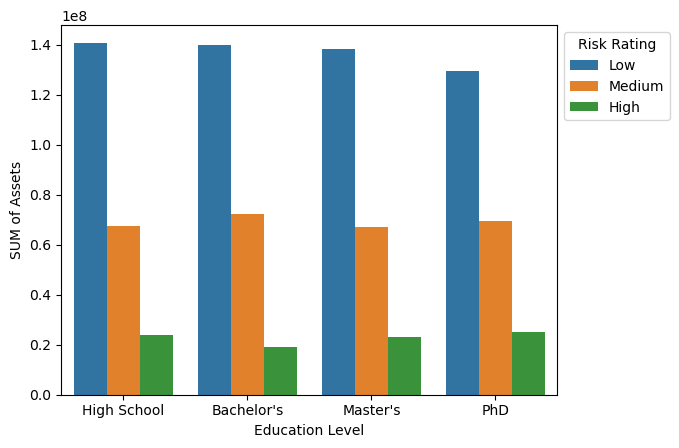

In [138]:
ax = sns.barplot(
    data=avg_asset_by_education_lvl_risk_rating,
    x="Education Level",
    y="SUM of Assets",
    hue="Risk Rating"
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Insights:
- People with higher assets have low financial risk rating
- People with low assets have high financial risk rating

## proportion of high financial risk rating by age band

In [161]:
prop_high_risk_rating_by_age_band = df_clean.loc[
    df_clean["Risk Rating"]=="High",
    "Age Band"
].value_counts(normalize=True)

prop_high_risk_rating_by_age_band

Age Band
45-59    0.310835
30-44    0.269982
18-29    0.220249
>=60     0.198934
Name: proportion, dtype: float64

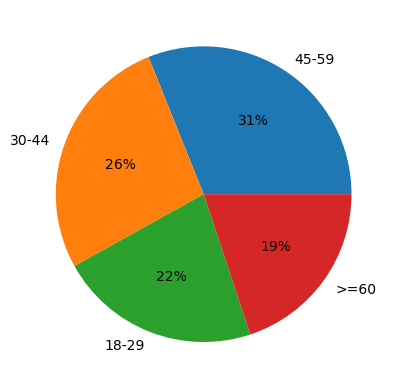

In [171]:
plt.pie(
    prop_high_risk_rating_by_age_band,
    labels=prop_high_risk_rating_by_age_band.index,
    autopct="%i%%"
)
plt.show()

Insights: 
- Age band 45-59 is the highest proportion of high financial risk rating by 31%

## proportion of low financial risk rating by age band

In [172]:
prop_low_risk_rating_by_age_band = df_clean.loc[
    df_clean["Risk Rating"]=="Low",
    "Age Band"
].value_counts(normalize=True)

prop_low_risk_rating_by_age_band

Age Band
30-44    0.322430
45-59    0.282126
18-29    0.212617
>=60     0.182827
Name: proportion, dtype: float64

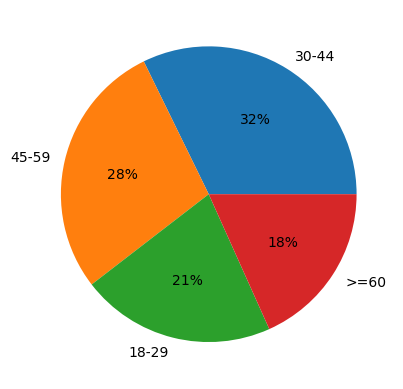

In [174]:
plt.pie(
    prop_low_risk_rating_by_age_band,
    labels=prop_low_risk_rating_by_age_band.index,
    autopct="%i%%"
)
plt.show()

Insights: 
- Age band 30-44 is the highest proportion of low financial risk rating by 32%

In [184]:
df_clean.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating', 'Age Band',
       'Continent'],
      dtype='object')

In [191]:
df_clean.groupby("Age Band", observed=True).agg({"Income": "mean"}).round(2)

,Income
Age Band,
18-29,70029.37
30-44,70048.74
45-59,70242.41
>=60,70523.88


## Distribution of DTI by High & Low Risk Ratings

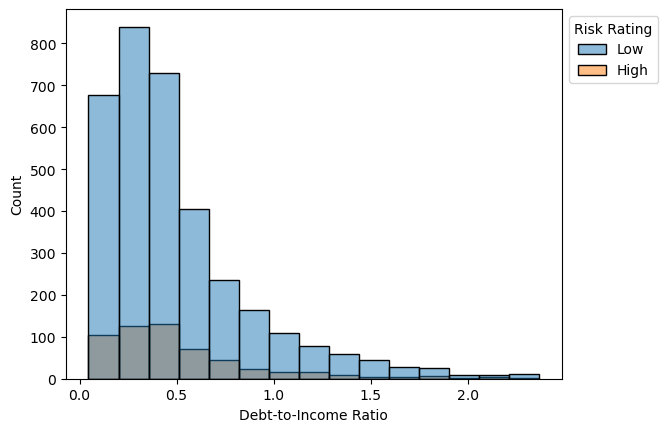

In [273]:
dti_high_low_risk_rating = df_clean.loc[
    df_clean["Risk Rating"].isin(["High", "Low"]),
    ["Debt-to-Income Ratio", "Risk Rating"]
]

dti_high_low_risk_rating["Risk Rating"] = dti_high_low_risk_rating["Risk Rating"].cat.remove_unused_categories()

ax = sns.histplot(
    data=dti_high_low_risk_rating,
    x="Debt-to-Income Ratio",
    hue="Risk Rating",
    kde=False,
    alpha=0.5,
    bins=15
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Insights:
- The distribution of DTI on high and low financial risk ratings are similar
- But the frequency of low risk rating are highest
- Indicating that DTI does't affect financial risk rating

# Conclusions

- People who have **high total loan amount and assets tend to have a low financial risk rating.**
- The average of Debt-to-Income Ratios are almost identical across all age groups, regardless of whether individuals are unemployed, self-employed, or employed.
- Age band 45-59 has the highest proportion on high financial rating by 31%
- Age band 30-44 has the highest proportion on low financial rating by 32%
- DTI ratio doesn't affect risk rating

**Recommendation**
> Individuals needs to increase their total assets and learn to manage their loan, so they can generate more revenue which can lead to decrease their financial risk rating.

# Export Cleaned Data

In [253]:
# export cleaned dataset into .csv format
df_clean.to_csv("dataset/clean_financial_risk_assesment.csv", index=False)